<a href="https://colab.research.google.com/github/jalevano/tfm_uoc_datascience/blob/main/Mes_1_experimento_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluación Comparativa de Técnicas de Segmentación para Fotografía de Personas con Generación Automática de Recomendaciones vía VLM


Realizar una evaluación comparativa sistemática de técnicas estado del arte para segmentación de personas en diferentes contextos fotográficos y demostrar la viabilidad de generar recomendaciones técnicas automáticas mediante Vision Language

## Mes 1: Setup + Baseline (Semanas 1-4)

**Semana 1-2: Setup Técnico e Implementación**

[X] Configuración del entorno de desarrollo

[X] Setup GPU computing environment

[X] Instalación de dependencias principales

[X] Configuración de repositorio Git

[ ] Implementación de modelos base

[ ] MaskDINO setup y testing

[ ] Preparar dataset categorizado por contextos fotográficos

[ ] Establecer métricas base reproducibles

In [7]:
## Imports necesarios.
import subprocess
import sys
import torch
import torchvision
import os
import urllib.request

from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
# 1. Desinstalar versiones actuales
subprocess.run([sys.executable, '-m', 'pip', 'uninstall', 'torch', 'torchvision', 'torchaudio', '-y'], capture_output=True)
# Instalar PyTorch con GPU
result = subprocess.run([sys.executable, '-m', 'pip', 'install', 'torch', 'torchvision'], capture_output=True, text=True)

In [ ]:
## Comprobamos que PyTorch está funcionando con GPU
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
print(f"Device: {torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'CPU'}")

PyTorch version: 2.7.1+cu126
CUDA available: True
Device: Tesla T4


In [6]:
## Creamos estructura de carpetas para organizar el trabajo
os.makedirs('test_images', exist_ok=True)
os.makedirs('results', exist_ok=True)
os.makedirs('results/maskdino', exist_ok=True)

In [8]:
## URLs de imágenes representativas (una persona, diferentes planos)
test_images = {
    'retrato': 'https://images.unsplash.com/photo-1507003211169-0a1dd7228f2d?w=600',  # Retrato/primer plano
    'plano_medio': 'https://images.unsplash.com/photo-1517841905240-472988babdf9?w=600',  # Plano medio
    'plano_general': 'https://images.unsplash.com/photo-1506794778202-cad84cf45f1d?w=600'  # Plano general
}

In [9]:
## Descargamos y guardamos las imágenes
for name, url in test_images.items():
    try:
        urllib.request.urlretrieve(url, f'test_images/{name}.jpg')
        print(f"Descargada: {name}.jpg")
    except Exception as e:
        print(f"Error descargando {name}: {e}")

Descargada: retrato.jpg
Descargada: plano_medio.jpg
Descargada: plano_general.jpg


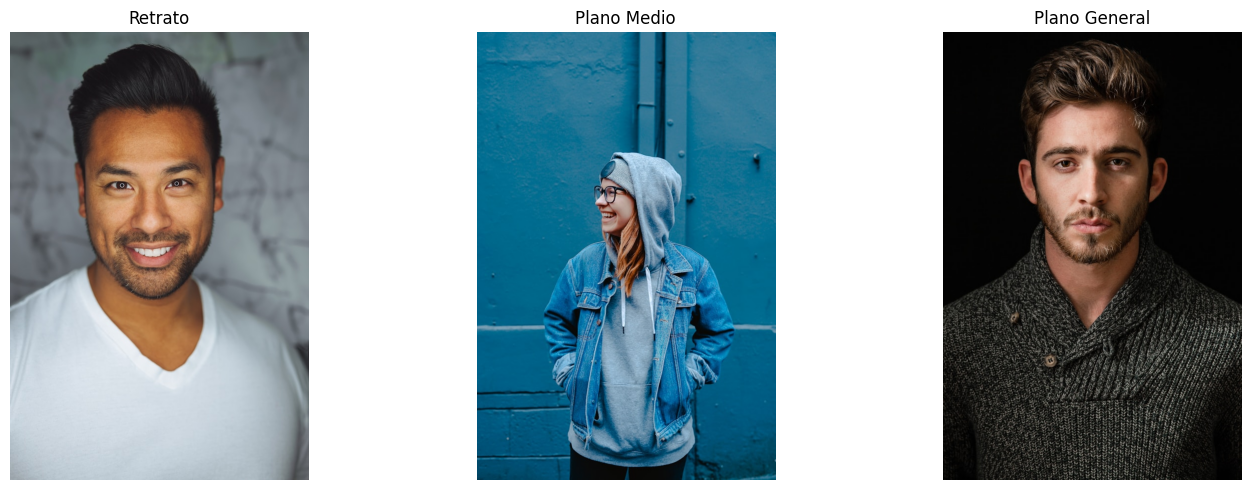

In [10]:
## Visualizamos el dataset de prueba
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, (name, _) in enumerate(test_images.items()):
    try:
        img = Image.open(f'test_images/{name}.jpg')
        axes[i].imshow(img)
        axes[i].set_title(f'{name.replace("_", " ").title()}')
        axes[i].axis('off')
    except:
        axes[i].text(0.5, 0.5, f'Error loading\n{name}', ha='center', va='center')
        axes[i].set_title(f'{name.replace("_", " ").title()} - ERROR')

plt.tight_layout()
plt.show()